In [6]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


##I'm taking these notes from Pissanetsky's "Sparse Matrix Technology"

###CH 1 Fundamentals (Storage)

A linear linked list is a set of cells linked together in some order. Each cell contains an item of the list and a pointer which indicates where the next cell is located. As an example, consider that we wish to stor the numbers a, b, c and d, in that order, in an array A(I). The storage could look as follows:

In [35]:
x = np.infty #can be anything
A = [x,"b",x,"d","a",x,"c",x]
NEXT = [x,6,x,-1,1,x,3,x]
START = 4
END = -1

location = START
while True:
    print(A[location])
    location = NEXT[location]
    if(location == END):
        break

a
b
c
d


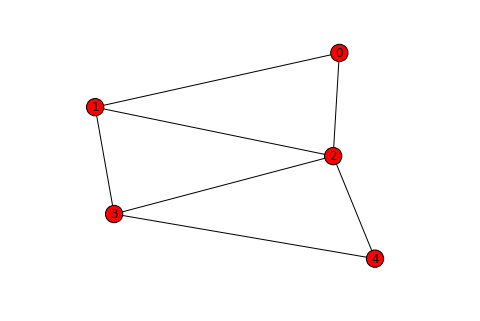

In [7]:
a = array([[0,1,1,0,0],[1,0,1,1,0],[1,1,0,1,1],[0,1,1,0,1],[0,0,1,1,0]])
G = nx.Graph(a)
nx.draw(G)

A graph can be represented in the computer memory by storing for each vertex, the listof vertices which are adjacent to it

In [19]:
LIST = [1,2,0,2,3,0,1,3,4,1,2,4,2,3]
IP  = [0,2,5,9,12,14]

for i in range(5):
    for j in range(IP[i],IP[i+1]):
        print(i,"connected to", LIST[j])

0 connected to 1
0 connected to 2
1 connected to 0
1 connected to 2
1 connected to 3
2 connected to 0
2 connected to 1
2 connected to 3
2 connected to 4
3 connected to 1
3 connected to 2
3 connected to 4
4 connected to 2
4 connected to 3


We describe first the sparse storage scheme proposed by Knuth. The nonzero elements are stored in the computer memory in any order in a one-dimensional array, say AN. Information regarding where each nonzero belongs can be stored in two additional parallel one-dimensional arrays, say I and J, which contain the corresponding nonzero. Thus for each $A_{ij} \neq 0$, the triple $(A_{ij}, i, j)$ is kept in memory. Furthermore, in order to be able to easily find the elements in a certain row or column, it becomes necessary to store a pair of pointers together with each triple and row and column heads, which tell where to enter each row or column list. Let NR ("next nonzero element in the same row") be the array which keeps the row pointers and NC be the array with the column pointers. The five arrays AN, I, J, NR, and NC are of the same length, with their positions in correspondence. Let JR and JC be the arrays which contain the row and column heads.

In [21]:
A = array([[0,6,0,0],[9,4,0,7],[5,0,0,0],[0,2,0,8]])
A

array([[0, 6, 0, 0],
       [9, 4, 0, 7],
       [5, 0, 0, 0],
       [0, 2, 0, 8]])

In [32]:
x = None
AN = [6,9,4,7,5,2,8]
I =  [0,1,1,1,2,3,3]
J =  [1,0,1,3,0,1,3]
NR = [x,2,3,x,x,7,x]
NC = [2,4,5,6,x,x,x]
JR = [0,1,4,5]
JC = [1,0,x,3]

for i in range(4):
    print("Column", i)
    cur = JC[i]
    while (cur != None):
        print(AN[cur], "row", I[cur])
        cur = NC[cur]



Column 0
9 row 1
5 row 2
Column 1
6 row 0
4 row 1
2 row 3
Column 2
Column 3
7 row 1
8 row 3


The sparse row-wise format has minimal storage requirements and at the same time it has proved to be very convenient for several important operations such as addition, multiplication, transpostition, the solution of linear equations by either direct or iterative methods, etc. 

In this scheme, the values of the nonzero elements of the matrix are stored by rows, along with their corresponding column indices, in two arrays AN and JA. An array of pointers, IA, is also provided to indicate the beginning of each row. An extra entry in IA contains a pointer to the first empty position in AN and JA.

In [33]:
AN = [6,9,4,7,5,2,8] 
JA = [1,0,1,3,0,1,3] #Same as J from above, because we luckily picked the numbers in that order
IA = [0,1,4,5,7] #Note this is the number of rows + 1

for i in range(4):
    print("Row", i)
    for j in range(IA[i],IA[i+1]):
        print(AN[j],"column", JA[j])

Row 0
6 column 1
Row 1
9 column 0
4 column 1
7 column 3
Row 2
5 column 0
Row 3
2 column 1
8 column 3


This representation is said to be complete because the entire matrix is represented, and ordered because the elements of each row are stored in the ascending order of their column indices. It is thus a <b>R</b>ow-wise <b>R</b>epresentation <b>C</b>omplete and <b>O</b>rdered, or <b>RR(C)O</b>.

The arrays IA and JA represent the structure of the matrix, given as the set of the adjacency list of the <b>graph</b> associated with the matrix. If an algorithm is divided into a symbolic section and a numerical section, the arrays IA and JA are computed by the symbolic section, and the array AN by the numerical section.

Sparse matrix representations do not necessarily have to be ordered, in the sense that the elements of each row can be stored in any order while preserving the order of the rows. The matrix above can equally well be given in a <b>R</b>ow-wise <b>R</b>epresentation <b>C</b>omplete and <b>U</b>nordered, or <b>RR(C)U</b>.

In [34]:
AN = [6,7,9,4,5,8,2] 
JA = [1,3,0,1,0,3,1] 
IA = [0,1,4,5,7]

for i in range(4):
    print("Row", i)
    for j in range(IA[i],IA[i+1]):
        print(AN[j],"column", JA[j])

Row 0
6 column 1
Row 1
7 column 3
9 column 0
4 column 1
Row 2
5 column 0
Row 3
8 column 3
2 column 1


Unordered representations can be very convenient. The results of most matrix operations are obtained in unordered representations. Furthermore, most sparse matrix algorithms do not require the representation to be ordered.


A data structure which is ready before initiation of numerical execution is termed a static structure. Preparing it requires knowledge of the number of nonzero elements and their positions in the matrix before they are actually calculated. A number of matrix algorithms allow prediction of the necessary information. Any such algorithm splits naturally into two parts: the symbolic section which does the data structure set-up, and the numerical section which performs the actual numerical calculations.

Static schemes promote modularity, because the symbolic and numerical steps are executed separately and consequently can be independently optimized. Another important advantage arises in cases which require repeated use of the same algorithm but with different numerical values, for example iterative methods. In such cases the symbolic step may be performed once only and the same static structure used for the entire calculation.

###Merging sparse lists of integers

The operation of merging lists of integers is very important in sparse matrix technology because it is commonly used to form the list of the column indices associated with each of the rows of a new matrix.

In [53]:
A = [2,7,3,5]
B = [3,11,5]
C = [7,2]

def merge(a,b,N):
    #I believe for this algorithm to work we need to know the maximum value, which here is 11
    IX = [False for j in range(N+1)]
    M = []
    for i in a:
        M.append(i)
        IX[i] = True  
    for i in b:
        if not IX[i]:
            M.append(i)
            IX[i] = True       
    return M

merge(C, merge(A, B, 11), 11)

[7, 2, 3, 5, 11]

###Addition of sparse vectors

Consider two sparse vectors $a$ and $b$, of order N, stored in compact unordered format in the arrays JA, AN, and JB, BN.  We wish to calculate:

$$C = a + b$$
```
JA = 10  3  7   4
AN = .2 .3 .4 -.7

JB =  5  4 10
BN = .6 .7 .5
```

An efficient procedure is obtained when the algorithm is split into a symbolic section and a numerical section.

In [54]:
JA = [10, 3, 7, 4]
AN = [.2, .3, .4, -.7]

JB =  [5, 4, 10]
BN = [.6, .7, .5]

JC = merge(JA, JB, 15)
JC

[10, 3, 7, 4, 5]

In [57]:
X = [0 for i in range(15)]
for i in range(len(JA)):
    X[JA[i]] = AN[i]
for i in range(len(JB)):
    X[JB[i]] += BN[i]    
CN = [0 for i in range(len(JC))]
for i in range(len(JC)):
    CN[i] = X[JC[i]]
CN    

[0.7, 0.3, 0.4, 0.0, 0.6]

The numerical example was chosen purposely to obtain $c_4 = 0$. Cancellation between real numbers is rare and is usually disregarded. This means that a few of the "nonzeros" of a sparse matrix may in fact be zeros, and the algorithms should be prepared to accept this circumstance. In some cases, however, cancellation may be frequent and in such cases it may be convenient to deal with the zeros.

It also should be noted that the result is unordered. If the results should be ordered, it suffices to order JC alone before performing the numerical algorithm.

###Dot Product of two vectors

In [66]:
N = 15
IP = [None for i in range(N)]
for i in range(len(JA)):
    IP[JA[i]] = i
h = 0.0
for i in range(len(JB)):
    if(IP[JB[i]] != None):
        h += AN[IP[JB[i]]]*BN[i]
h        

-0.3899999999999999